# Proposal

For my final project, I would like to collect and analyze my Spotify data from the past six years. I would test the what years I listened to the most music and the correlation between my top artists and songs and the genres. 

## Purpose/Reasoning

The reason I want to do this topic is I want to have a better understanding of coding for analysis and I want to better understand my habit in my listening history to better understand myself and my tastes.


# Hypothesis

I predict that I will have listened to the most music in 2020-2022 and the correlation between my top artists and songs and the genres, with the generes being kpop and alternative/indie. 

# Data in hand (starting point)/ load data in

I have downloaded my accounts spotify data with the entirity of my listening history. To collect ths data I went into my account profile on spotify and then went into the account privacy then scrolled down until the download my data section and followed the instructions given  and then downloaded my extended listening history data from there and recieved an email in my inbox a few days later stating that my data was ready to be downloaded. I then downloaded the zip file and expanded it into usable data pages. It is split into mulitple different pages to cover the various songs and years that I have been using my spotify account. All of the files are housed within one folder for a chomprehensive look at my extended streaming history. For the sake of ease I may have to shrink my data to only one of the files, which from my research into the different pages would be part of a year, and maybe some of a boarding year depending on the breakdown and split. The files would be similar to those from the beginning of the semester and they are a json file type.

ex. of the file url to link into the code later: /Users/madelinelally/Downloads/Spotify Extended Streaming History/Streaming_History_Video_2021-2025.json

In [19]:
# 1. Import libraries

import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [20]:

folder = r"/Users/madelinelally/Downloads/data in emat/Spotify Extended Streaming History"

all_data = []

for filename in os.listdir(folder):
    if filename.endswith(".json"):
        with open(os.path.join(folder, filename), "r") as f:
            all_data.extend(json.load(f))


In [21]:
# Convert to DataFrame
df = pd.DataFrame(all_data)
df.head()


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2022-04-27T10:48:27Z,"iOS 15.4.1 (iPhone12,1)",195866,US,173.90.175.125,Oh my god,(G)I-DLE,I trust,spotify:track:2DmRXiyn03tOqKgEJXlaiJ,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
1,2022-04-27T10:51:58Z,"iOS 15.4.1 (iPhone12,1)",205833,US,173.90.175.125,moonchild,RM,mono.,spotify:track:4fwYALz7GwmXgS8QTRjDEJ,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
2,2022-04-27T10:55:48Z,"iOS 15.4.1 (iPhone12,1)",229946,US,173.90.175.125,STUCKINMYBRAIN,Chase Atlantic,PHASES,spotify:track:4y38UExfSH97v6mz5Ii9am,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
3,2022-04-27T10:57:51Z,"iOS 15.4.1 (iPhone12,1)",122723,US,173.90.175.125,Can't Love Myself,Monty Datta,Can't Love Myself,spotify:track:0MO1qNhm8aRZchi8CJlIRo,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
4,2022-04-27T10:59:09Z,"iOS 15.4.1 (iPhone12,1)",76128,US,173.90.175.125,Losing You,WONHO,Love Synonym #1: Right for Me,spotify:track:2Bk8jjFB0FfAFYUIxihOnG,None,...,None,None,None,trackdone,fwdbtn,True,False,False,NaN,False


## Analyze the Data further
The data will be broken down in various different ways showing my listening history over the past six years. It will be broken down in different graphs and charts to depict the daily minutes listened over time, the top 10 artists by listening time, my top 10 songs by listening time, a listening heatmap, and a monthly listening time

In [22]:
# Convert timestamps to datetime
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')

# Convert ms → minutes listened
df['minutes_played'] = df['ms_played'] / 60000

# Remove entries with no valid timestamp
df = df.dropna(subset=['ts'])


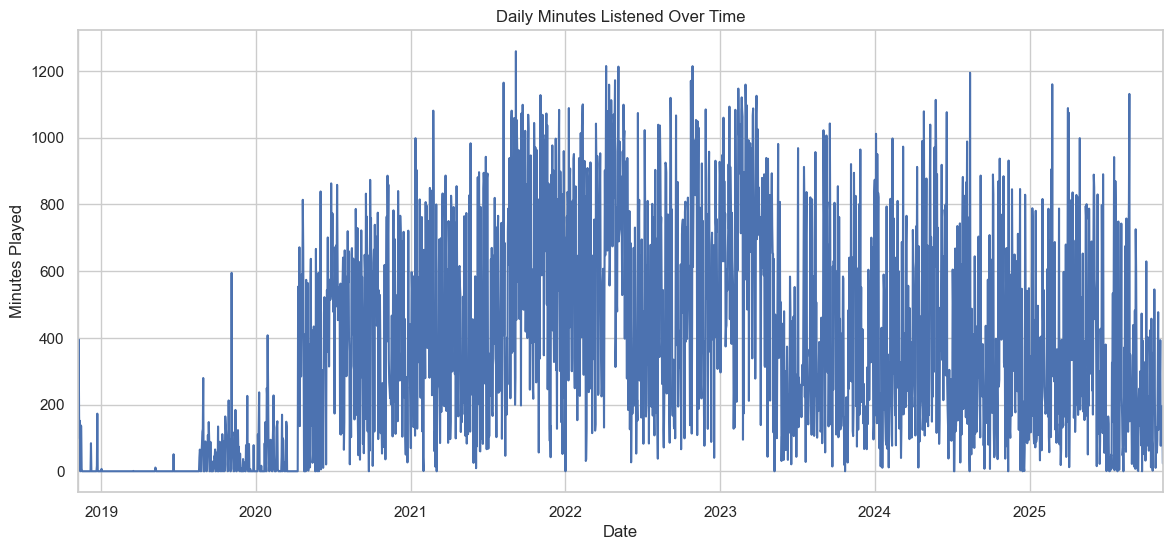

In [23]:
plt.figure(figsize=(14,6))
df.set_index('ts')['minutes_played'].resample('D').sum().plot()
plt.title("Daily Minutes Listened Over Time")
plt.xlabel("Date")
plt.ylabel("Minutes Played")
plt.show()


/var/folders/zj/ddt921s170zc0yz7nvcyp9dr0000gn/T/ipykernel_55505/2956115270.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="mako")


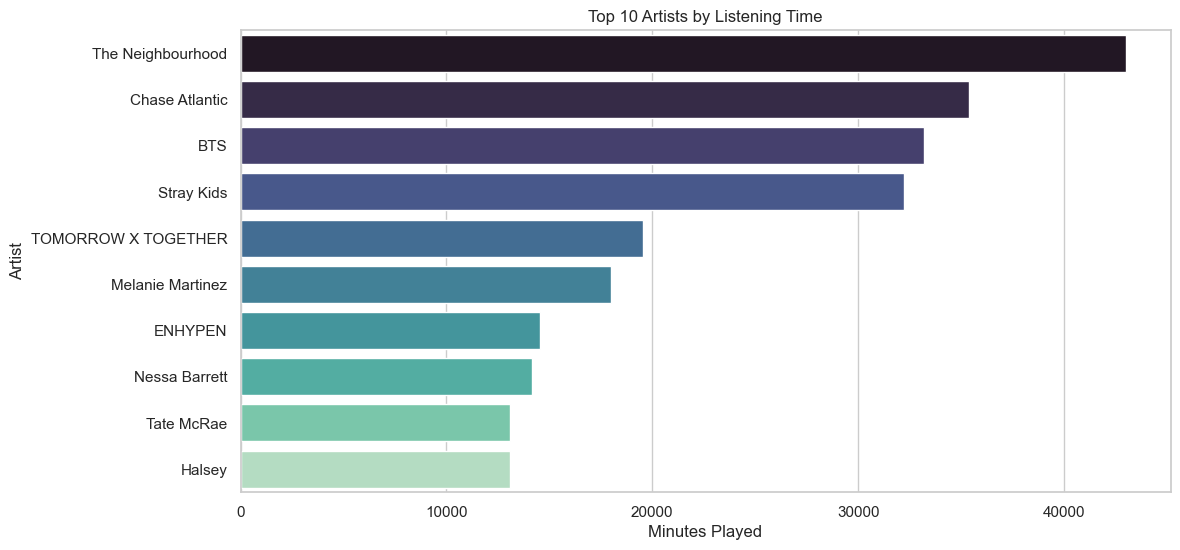

In [24]:
top_artists = (
    df.groupby('master_metadata_album_artist_name')['minutes_played']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

sns.barplot(y=top_artists.index, x=top_artists.values, palette="mako")
plt.title("Top 10 Artists by Listening Time")
plt.xlabel("Minutes Played")
plt.ylabel("Artist")
plt.show()


/var/folders/zj/ddt921s170zc0yz7nvcyp9dr0000gn/T/ipykernel_55505/2834269346.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_tracks.index, x=top_tracks.values, palette="viridis")


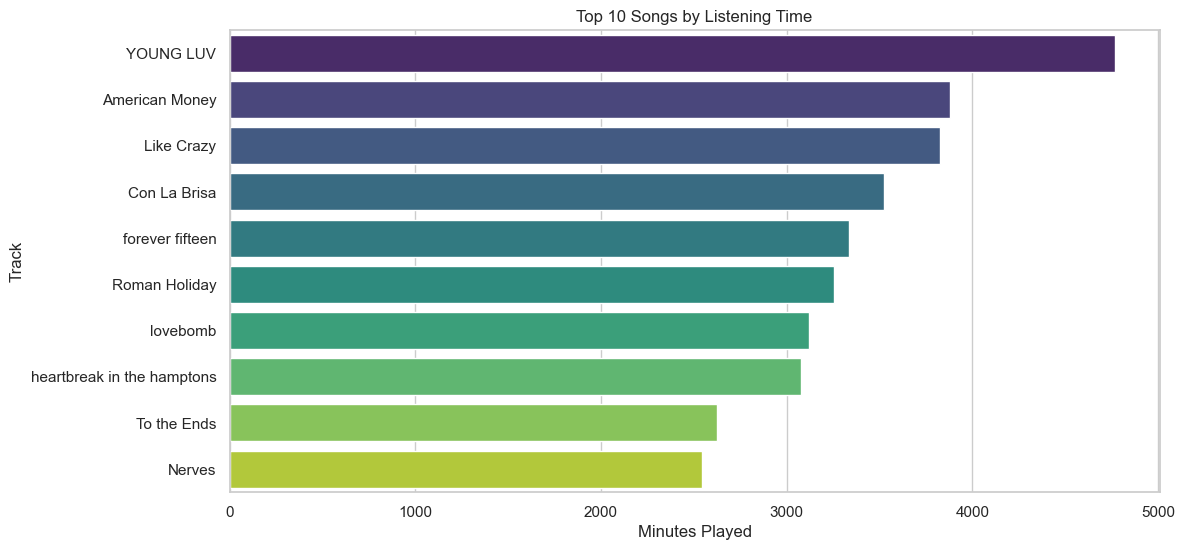

In [25]:
top_tracks = (
    df.groupby('master_metadata_track_name')['minutes_played']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

sns.barplot(y=top_tracks.index, x=top_tracks.values, palette="viridis")
plt.title("Top 10 Songs by Listening Time")
plt.xlabel("Minutes Played")
plt.ylabel("Track")
plt.show()


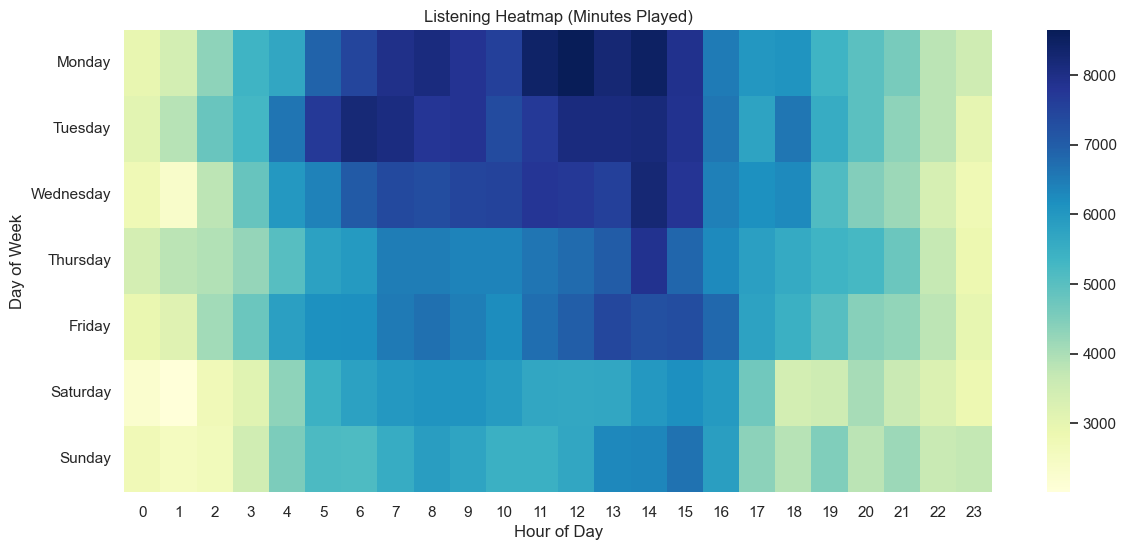

In [26]:
df['hour'] = df['ts'].dt.hour
df['day'] = df['ts'].dt.day_name()

pivot = df.pivot_table(
    index='day',
    columns='hour',
    values='minutes_played',
    aggfunc='sum'
)

# Reorder days
pivot = pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Listening Heatmap (Minutes Played)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


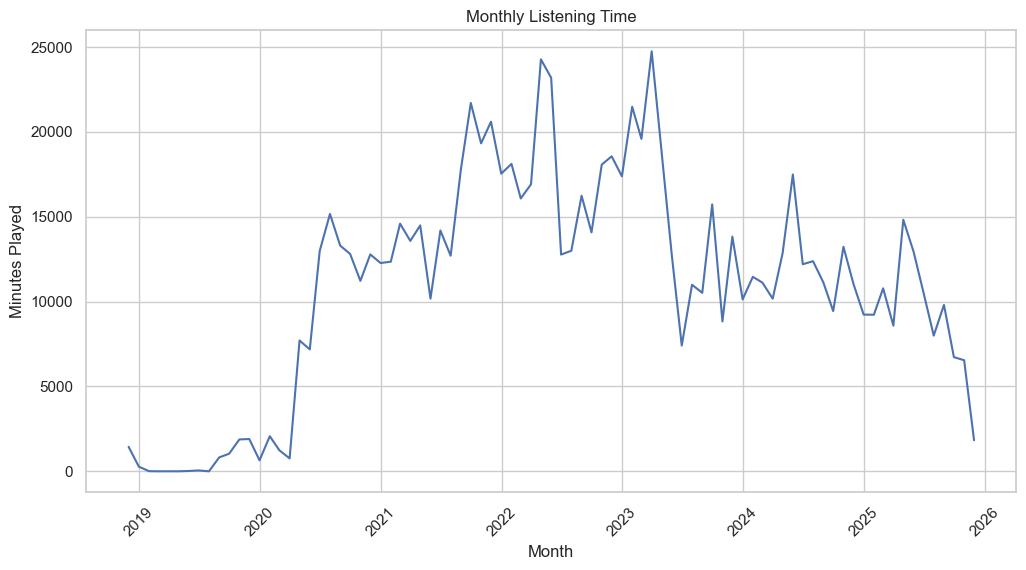

In [27]:
monthly = df.set_index('ts')['minutes_played'].resample('ME').sum()

plt.plot(monthly.index, monthly.values)
plt.title("Monthly Listening Time")
plt.xlabel("Month")
plt.ylabel("Minutes Played")
plt.xticks(rotation=45)
plt.show()


##  What I did, the results, and Conclusion

Based on this data I would condlude that my hypothesis was partially correct in thinking that i had listened to the most music in 2020-2022, I did have some of the highest listening in 2022 however 2023 had more minutes than either 2021 or 2020. Though 2021 and 2024 were very close in amount of minutes listened and 2020 being on of my lowest listening years. However my hypothesis of the correlation of my top artisis and songs mainly falling under the genres kpop and alternative/indie was correct.
Also note that chatgpt has been use throughout for assistance in figuring out the proper code and adjustments, espicaially with creating the graphs and charts.

During this process I learned the importace of visualiazers within data breakdowns. They make understanding the data so much easier and faster compared to if there were not any. Some new questions that could have been asked in order to further my analysis breakdown was an intensive listening history breakdown of the songs, artists, and genres of each month. Most of my blindspots and limitations fall under the fact that I am not an experianced coder and do not have the confidence to try to use more complex and confusing matters of code.